# Data Preprocessing

In [1]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load customer churn dataset
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# Hapus kolom yang tidak relevan
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [5]:
# Drop rows with missing target labels (if any)
df = df.dropna(subset=['Exited'])

In [6]:
# Check for missing values
print(df.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


# EDA

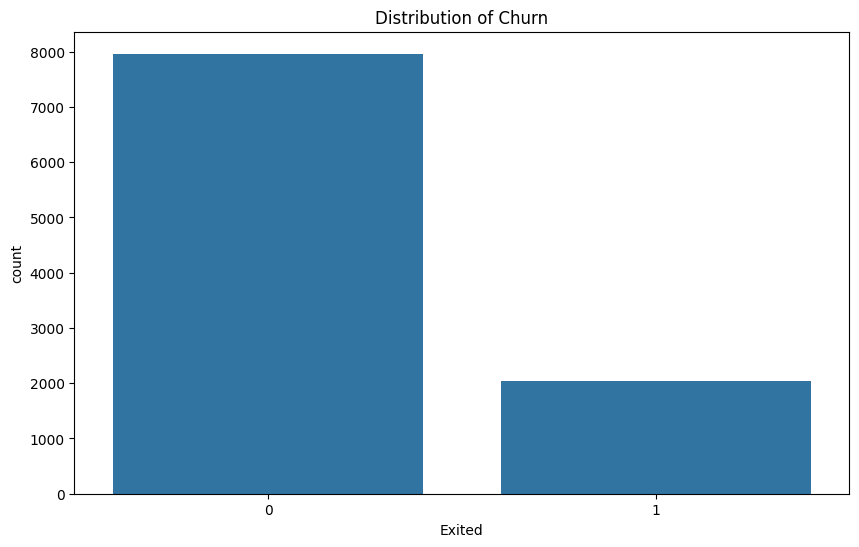

In [7]:
# Exploratory Data Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Exited')
plt.title('Distribution of Churn')
plt.show()

Ketidakseimbangan Data: Terlihat bahwa sebagian besar nasabah memiliki label 0 (tidak churn), sementara hanya sebagian kecil yang memiliki label 1 (churn). Ini menunjukkan bahwa data churn memiliki distribusi yang tidak seimbang. Situasi ini penting karena model prediksi yang dilatih dengan data seperti ini cenderung bias terhadap kategori mayoritas (nasabah yang tidak churn).

Implikasi terhadap Pemodelan: Ketidakseimbangan data seperti ini mengindikasikan perlunya penggunaan metrik evaluasi yang sesuai (seperti F1-score), untuk mengatasi bias dan memastikan model dapat mendeteksi churn dengan baik.

# Feature Engineering

In [11]:
# Feature Engineering
# One-hot encoding untuk variabel kategorikal
df = pd.get_dummies(df, columns=['Geography', 'Gender'])

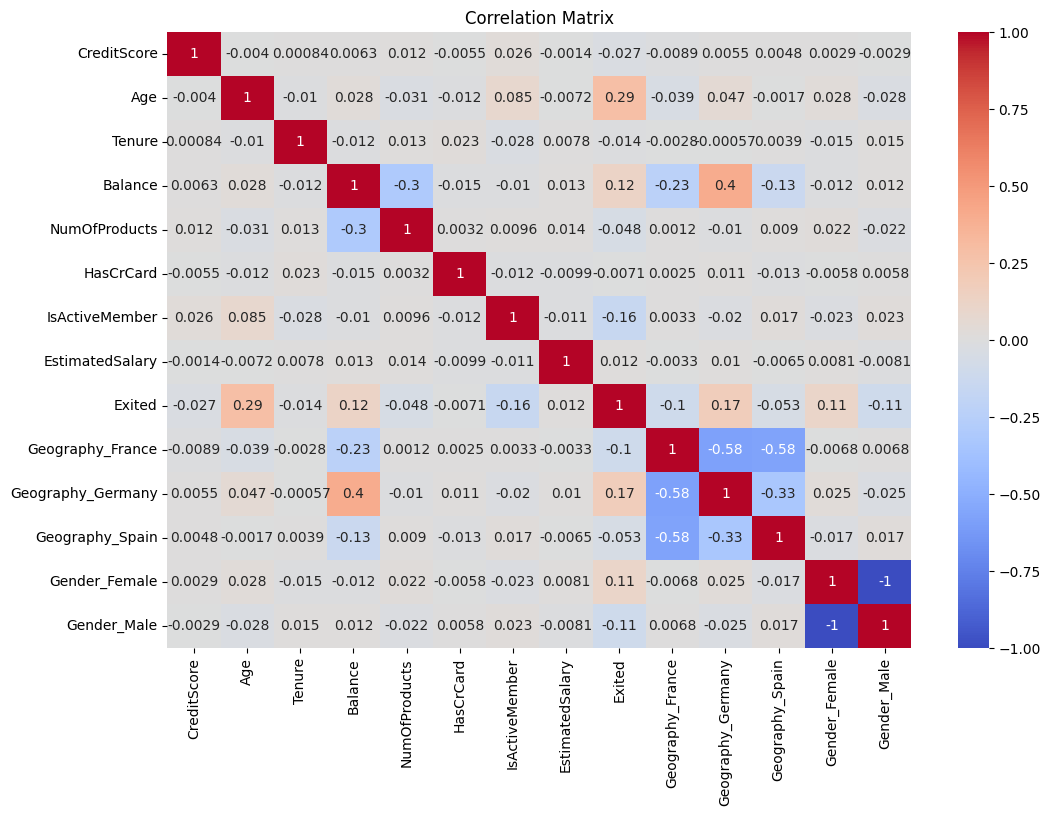

In [12]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Dari matriks korelasi yang ditampilkan, berikut adalah beberapa insight yang dapat diperoleh:

1. Korelasi Terhadap Churn (Exited):
- Age memiliki korelasi positif yang cukup tinggi terhadap churn (Exited) dengan nilai korelasi sekitar 0.29. Ini menunjukkan bahwa semakin tua usia nasabah, cenderung semakin tinggi kemungkinan mereka untuk churn.
- IsActiveMember memiliki korelasi negatif dengan churn sekitar -0.16, yang berarti nasabah yang aktif berinteraksi dengan bank cenderung memiliki kemungkinan lebih kecil untuk churn.
- Geography_Germany menunjukkan korelasi positif (0.17) terhadap churn, sementara Geography_France dan Geography_Spain memiliki korelasi negatif. Ini menunjukkan bahwa nasabah dari Jerman mungkin memiliki kecenderungan lebih tinggi untuk churn dibandingkan dengan nasabah dari Prancis atau Spanyol.

2. Korelasi Antara Fitur Lainnya:
- Balance dan NumOfProducts memiliki korelasi negatif yang signifikan (-0.3), menunjukkan bahwa nasabah dengan saldo tinggi cenderung memiliki jumlah produk yang lebih sedikit.
- Geography_Germany memiliki korelasi positif dengan Balance (0.4), yang bisa diartikan bahwa nasabah dari Jerman cenderung memiliki saldo yang lebih tinggi dibandingkan dengan nasabah dari negara lain.

3. Tidak Ada Multikolinearitas yang Parah:
- Tidak ada korelasi sangat tinggi (mendekati 1 atau -1) antara fitur-fitur utama (selain antara kategori biner yang berkebalikan seperti Gender_Female dan Gender_Male). Hal ini menunjukkan bahwa tidak ada multikolinearitas parah antar variabel yang memerlukan tindakan khusus dalam pemodelan.


In [13]:
# Prepare data for modeling
X = df.drop('Exited', axis=1)
y = df['Exited']

In [14]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM Modelling

In [15]:
# Create base SVM model
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [16]:
# Predict on the test set
y_pred = svm.predict(X_test)

In [17]:
# Evaluate base model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8035
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


f1-score: 0.00

# Hyperparameter Tuning

karena running process dari tuning sebelum dilakukan undersampling memakan waktu terlalu lama. maka dari itu, disini saya aplikasikan undersampling demi menghemat waktu.

In [18]:
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_scaled, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.2,
    random_state=42
)

In [19]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

In [20]:
# Grid Search with Cross Validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
             scoring='f1')

In [21]:
# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best f1 score: ", grid_search.best_score_)

Best parameters found:  {'C': 1, 'kernel': 'rbf'}
Best f1 score:  0.7686808970345991


# Evaluate Classification and Confusion Matrix

In [22]:
# Use the best model for predictions
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)

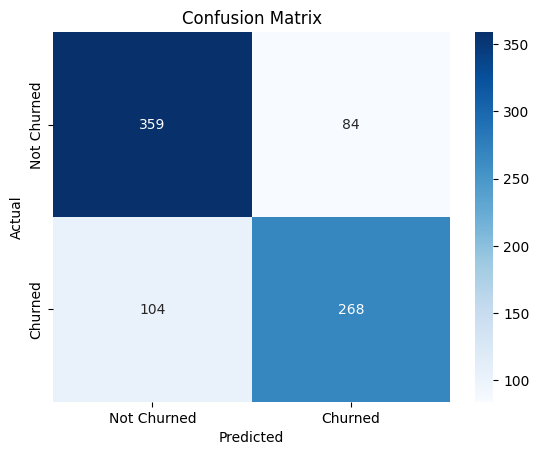

In [24]:
# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Interpretasi Confusion Matrix:

- True Negatives (TN): 359 kasus di mana model memprediksi "Not Churned" dan benar.
- False Positives (FP): 84 kasus di mana model memprediksi "Churned" tetapi sebenarnya "Not Churned".
- False Negatives (FN): 104 kasus di mana model memprediksi "Not Churned" tetapi sebenarnya "Churned".
- True Positives (TP): 268 kasus di mana model memprediksi "Churned" dan benar.

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Accuracy: 0.7693251533742331
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.79       443
           1       0.76      0.72      0.74       372

    accuracy                           0.77       815
   macro avg       0.77      0.77      0.77       815
weighted avg       0.77      0.77      0.77       815



Diketahui bahwa setelah melakukan Tuning, nilai f1-score menjadi lebih baik

# Analisis hasil dan insight dari model SVM


Permutation Feature Importances for Non-Linear SVM:
               feature  importance
4       NumOfProducts    0.113700
1                 Age    0.101301
6      IsActiveMember    0.034014
9   Geography_Germany    0.019667
3             Balance    0.016339
10    Geography_Spain    0.005461
5           HasCrCard    0.004603
11      Gender_Female    0.004451
12        Gender_Male    0.004451
0         CreditScore   -0.000353
7     EstimatedSalary   -0.000609
2              Tenure   -0.004674
8    Geography_France   -0.009932


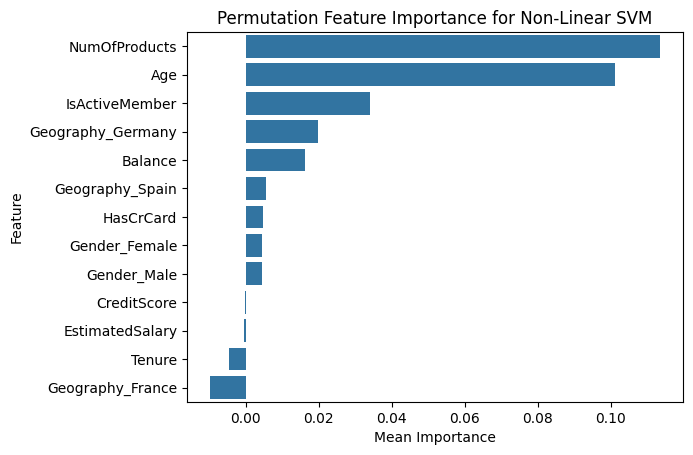

In [27]:
# Check if the best model uses a linear kernel
if grid_search.best_params_['kernel'] == 'linear':
    # Extract feature importance from coefficients
    feature_importance = pd.Series(
        best_svm.coef_.flatten(),
        index=X.columns
    ).abs().sort_values(ascending=False)

    print("Feature Importances for Linear SVM:\n", feature_importance)

    # Plot the feature importance
    feature_importance.plot(kind='bar')
    plt.title("Feature Importance for Linear SVM")
    plt.xlabel("Features")
    plt.ylabel("Importance (absolute value of coefficients)")
    plt.show()

else:
    # Calculate permutation importance for non-linear SVM
    perm_importance = permutation_importance(best_svm, X_test, y_test, scoring='f1')

    # Create DataFrame of feature importances
    feature_importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': perm_importance.importances_mean
    }).sort_values(by='importance', ascending=False)

    print("Permutation Feature Importances for Non-Linear SVM:\n", feature_importance_df)

    # Plot the permutation importance
    sns.barplot(x='importance', y='feature', data=feature_importance_df)
    plt.title("Permutation Feature Importance for Non-Linear SVM")
    plt.xlabel("Mean Importance")
    plt.ylabel("Feature")
    plt.show()

Dari visualisasi fitur penting (feature importance) untuk model Non-Linear SVM menggunakan teknik Permutation Feature Importance, berikut adalah beberapa insight yang dapat diperoleh:

1. Fitur Terpenting:
- NumOfProducts dan Age merupakan dua fitur yang paling berpengaruh dalam menentukan churn, dengan nilai penting yang lebih tinggi dibandingkan fitur lainnya. Hal ini menunjukkan bahwa jumlah produk yang dimiliki nasabah dan usia nasabah memiliki dampak besar terhadap kemungkinan nasabah untuk churn.
- IsActiveMember adalah fitur penting lainnya. Hal ini sejalan dengan insight sebelumnya bahwa nasabah yang aktif berinteraksi dengan bank cenderung memiliki kemungkinan churn yang lebih rendah.

2. Fitur Geografis:
- Geography_Germany dan Geography_Spain juga memiliki nilai penting dalam model ini, dengan nasabah dari Jerman tampaknya lebih relevan dalam menentukan churn dibandingkan dengan nasabah dari negara lain. Ini bisa mengindikasikan adanya faktor-faktor khusus terkait lokasi yang memengaruhi keputusan churn.

3. Saldo dan Kartu Kredit:
- Balance (Saldo) dan HasCrCard memiliki nilai penting yang lebih kecil, tetapi tetap memiliki pengaruh. Saldo mungkin menunjukkan kemampuan finansial nasabah, sementara kepemilikan kartu kredit (HasCrCard) bisa memengaruhi pola transaksi dan hubungan mereka dengan bank.

4. Fitur dengan Pengaruh Rendah:
- Fitur seperti Gender, CreditScore, EstimatedSalary, dan Tenure memiliki pengaruh yang relatif rendah terhadap churn dalam model ini. Ini mengindikasikan bahwa dalam konteks data ini, faktor-faktor tersebut kurang relevan untuk memprediksi churn dan mungkin dapat diabaikan atau digabungkan dengan fitur lain.

Insight untuk Pengelolaan Churn:
- Dengan fokus pada fitur yang lebih penting, seperti jumlah produk yang dimiliki, usia, dan keaktifan nasabah, perusahaan dapat mengembangkan strategi retensi yang lebih terarah. Misalnya, nasabah yang memiliki lebih sedikit produk dan berusia tertentu mungkin perlu lebih banyak keterlibatan untuk mengurangi churn.
- Analisis lebih dalam pada nasabah dari negara tertentu, seperti Jerman dan Spanyol, dapat membantu memahami alasan spesifik yang mendorong churn di segmen-segmen tersebut.